# Practice 3: N-point Statistics

## Course "Métodos Estadísticos y Numéricos en Cosmología"

##### Rafael Morales Moreno, Maestría en Ciencias (Física), UNAM

## 1. Exercise: Training on FFT in 1D
1. Let’s start playing with FFT to understand the way it works on python. First, just to check we understand, let’s work in 1-d. Generate de function of _ for x between 0 and 7 and plot it.
$$ f(x) = 1, \ 3 < x < 4 $$

$$ f(x) = 0, \ x > 4 \mbox{ or } x < 3 $$

2. Apply FFT (**np.fft.fft**) on this and plot it (real part) verify it gives the equation (2). In order to get the array of values 'k' you have to use the function **np.fft.fftfreq()**. If your array in x space is xarr, you get the k array karr as: **np.fft.fftfreq(arrx.shape[-1])**

$$ \hat{f}(k) \propto \frac{sin(kπ)}{kπ}. $$

3. Finally apply **IFFT** (**np.fft.ifft**) and verify you recover the original function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# Defining an array of N points from 0 to 7:

x_arr = np.linspace(0,7,num = 71, endpoint=True)
dx = 7/70

# Now building step function: 1 in [3,4], 0 everywhere else
def step_funct1(x):
    if (x >= 3 and x <= 4):
        return 1
    elif (x < 3 or x > 4):
        return 0

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


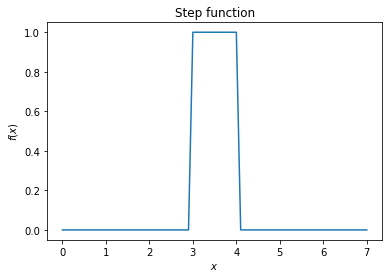

In [3]:
# Vectorizing step function in order to plot it

func_arr = np.zeros(len(x_arr))
for i in range(len(x_arr)):
    func_arr[i] = step_funct1(x_arr[i])
print(func_arr)

plt.plot(x_arr,func_arr)
plt.rcParams["figure.figsize"] = (4,2.6)
plt.title(r'Step function')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')

plt.show()

<ipython-input-4-0a472f9fd46f>:9: RuntimeWarning: invalid value encountered in true_divide
  sin_card = np.sin(k_arr*np.pi)/(k_arr*np.pi)


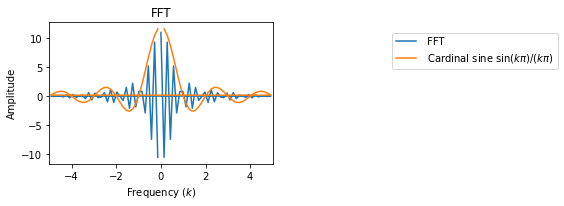

In [4]:
# Applying FFT and ploting (real part)

FFT_arr = np.fft.fft(func_arr) # Verifying it gives the equation (2)

# Using the np.fft.fftfreq() in order to get the array of values 'k'
k_arr = np.fft.fftfreq(x_arr.shape[-1],dx) # this is bc k is associated to the freq. space

# Defining the cardinal sine just to compare plots
sin_card = np.sin(k_arr*np.pi)/(k_arr*np.pi)

plt.plot(k_arr,FFT_arr.real, label=r' FFT')
plt.plot(k_arr,12*sin_card.real, label=r' Cardinal sine $\sin(k\pi)/(k\pi)$')
plt.xlim(-5,5)
plt.legend(loc='right',bbox_to_anchor=(2.3, 0.8))
plt.title(r'FFT')
plt.xlabel(r'Frequency $(k)$')
plt.ylabel(r'Amplitude')

# plt.rcParams["figure.figsize"] = (6,4.6)
plt.show()

# to reorganize k values, is useful to call np.fft.fftshift

/home/rafael/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


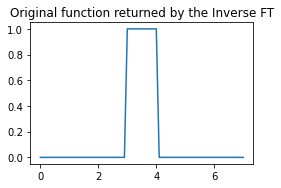

In [5]:
# Returning to the original function by means of the inverse FT

invese_f = np.fft.ifft(FFT_arr)
plt.plot(x_arr, invese_f)
plt.title(r'Original function returned by the Inverse FT')
plt.rcParams["figure.figsize"] = (4,2.6)
plt.show()

In [6]:
invese_f

array([ 2.63873430e-17+0.j, -3.29353133e-17+0.j, -7.17344806e-17+0.j,
        1.42687114e-17+0.j, -6.86070918e-17+0.j,  2.22826452e-17+0.j,
       -8.30712650e-18+0.j, -1.39755187e-17+0.j, -1.35845951e-17+0.j,
        4.69108320e-18+0.j,  4.03628617e-17+0.j,  1.98393727e-17+0.j,
        4.61289848e-17+0.j,  3.38148914e-17+0.j, -4.66176393e-17+0.j,
       -3.89946291e-17+0.j, -1.64187912e-17+0.j,  1.24118243e-17+0.j,
        4.40277705e-17+0.j, -1.56858095e-17+0.j, -9.07431407e-17+0.j,
        1.82756783e-17+0.j,  1.73961002e-17+0.j, -1.22163625e-17+0.j,
       -4.78881410e-17+0.j, -1.52948859e-17+0.j, -1.34379988e-17+0.j,
        4.38811741e-17+0.j,  8.56122684e-17+0.j,  9.75354383e-17+0.j,
        1.00000000e+00+0.j,  1.00000000e+00+0.j,  1.00000000e+00+0.j,
        1.00000000e+00+0.j,  1.00000000e+00+0.j,  1.00000000e+00+0.j,
        1.00000000e+00+0.j,  1.00000000e+00+0.j,  1.00000000e+00+0.j,
        1.00000000e+00+0.j,  1.00000000e+00+0.j,  0.00000000e+00+0.j,
        1.03790216e-

## 2 Playing with FFT in 2D

1. Look for an image in black and white and plot it with **imshow()** (or similar functions in python).
2. Eliminate modes with $k > k_0$ similar to slides showed in the lecture (See Figure 1).
3. Eliminate modes with $k < k_0$ similar to slides showed in the lecture.

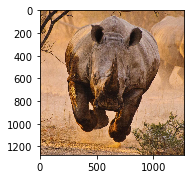

In [6]:
from skimage.io import imread, imshow # importing necessary modules for image treatment

rhino_im_arr = imread('rhino.jpg') # reading some chosen image
imshow(rhino_im_arr)   # showing image

(1274, 1274)

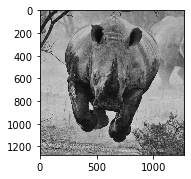

In [7]:
# It is important to note that we need to treat a B/W image, so
rhino_gray = imread('rhino.jpg', as_gray= True) # here the 2nd argument refers to convert into a B/W photo
# rhino_gray = rgb2gray(rhino_im_arr)  # this is another way to do it


imshow(rhino_gray)
plt.rcParams["figure.figsize"] = (8,8)
rhino_gray.shape # note that the image is perfectly square, so the dimensions x & y are the same (for simplicity)

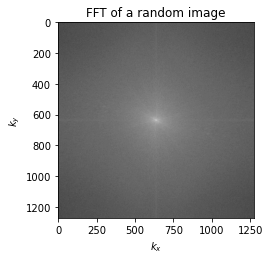

In [9]:
# 1. 
FFT_rhino = np.fft.fftshift(np.fft.fftn(rhino_gray))

plt.title(r'FFT of a random image')
plt.rcParams["figure.figsize"] = (5,3.6)
plt.xlabel(r'$k_x$')
plt.ylabel(r'$k_y$')
plt.imshow(np.log(np.abs(FFT_rhino) + 0.01), cmap='gray')

In [10]:
# 2. Eliminate modes with certain scale in k
     # in order to do that, first we obtain the arrays for k

k_rhinox = np.fft.fftfreq(rhino_gray.shape[0]) # this isn't the same as the coordinate x but the rows
k_rhinoy = np.fft.fftfreq(rhino_gray.shape[1]) # columns

# In consequence, the values for k_x and k_y are indeed the same (due to a square is treated)

# just to make sure we check
print(k_rhinox,'\n', k_rhinoy)

print('k_min =', min(k_rhinox),'; k_max =',max(k_rhinox)) # in order to know the range of k

[ 0.          0.00078493  0.00156986 ... -0.00235479 -0.00156986
 -0.00078493] 
 [ 0.          0.00078493  0.00156986 ... -0.00235479 -0.00156986
 -0.00078493]
k_min = -0.5 ; k_max = 0.4992150706436421


#### We know that cutting big scales in k implies to erase the small scales in real space and vice versa.

#### So, we're gonna take the values corresponding to k_large in the plot and the same for k_small

In [11]:
# choosing a particular value of k_0 which represents the limit k value where the cuts are made
k_01 = 0.45 # this is once we know the min. and max. values

# So, we'll take the condition over k BUT modify the image array in Fspace

# fftrhino_large = np.fft.fftshift(np.fft.fftn(rhino_gray)) # i.e., FFT_rhino # corresponding to eliminate large k
fftrhino_large = np.fft.fftn(rhino_gray) ### without shifting

# if the condition is satified, the entries will be stored in a new array
for i in range(rhino_gray.shape[0]):
    for j in range(rhino_gray.shape[1]):
        if ((k_rhinox[i])**2 + (k_rhinoy[j])**2)**0.5 > k_01:
            fftrhino_large[i][j] = 0

print(fftrhino_large)

[[ 7.96852555e+05    +0.j          9.91758967e+04  +592.50357999j
  -8.99579295e+03 -9905.83112395j ... -1.98719929e+04+25881.91761242j
  -8.99579295e+03 +9905.83112395j  9.91758967e+04  -592.50357999j]
 [ 1.90796905e+04-17149.32430622j -6.95208804e+04 +4445.34692479j
  -6.87936487e+03 -2285.11990124j ...  1.51543860e+02-24787.62045597j
  -2.75198970e+04 -5776.79923048j -4.82098577e+04+40200.67446395j]
 [-4.74693304e+03-14080.59967151j  2.23649015e+03-43572.6583012j
   2.86295319e+04+24523.65248768j ... -5.92517164e+03+12303.21871249j
   1.30310237e+04 +5172.52343116j -3.77737860e+04-25459.38566399j]
 ...
 [ 8.91542203e+03+12188.11624328j -2.24177037e+04 +2270.74298844j
   7.28170064e+03 +2741.40106906j ...  9.29613611e+03 +5941.36059253j
   1.01375101e+03 +9504.28775336j -1.86033335e+03 -9859.23149555j]
 [-4.74693304e+03+14080.59967151j -3.77737860e+04+25459.38566399j
   1.30310237e+04 -5172.52343116j ...  2.06378980e+04-26131.16902572j
   2.86295319e+04-24523.65248768j  2.23649015e+0

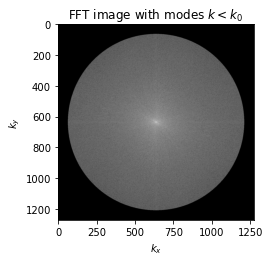

In [12]:
plt.title(r'FFT image with modes $k < k_0$ ')
plt.rcParams["figure.figsize"] = (6,4.6)
plt.xlabel(r'$k_x$')
plt.ylabel(r'$k_y$')
plt.imshow(np.log(np.abs(np.fft.fftshift(fftrhino_large).real) + 0.01), cmap='gray') #### Pasar aquí el shift

Text(0.5, 1.0, 'Inverse FFT for $k<k_0$ (Real image)')

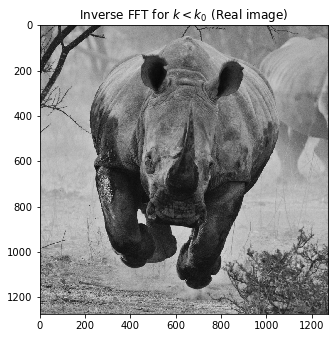

In [13]:
inverse_rhino_large = np.fft.ifftn(fftrhino_large)

imshow(inverse_rhino_large.real, cmap='gray')
plt.rcParams["figure.figsize"] = (8,8)
plt.title(r'Inverse FFT for $k<k_0$ (Real image)')

In [14]:
# fftrhino_small = np.fft.fftshift(np.fft.fftn(rhino_gray)) # '' small k
fftrhino_small = np.fft.fftn(rhino_gray) ### without shifting

k_02 = 0.01

# Now for k > k_0
for i in range(rhino_gray.shape[0]):
    for j in range(rhino_gray.shape[1]):
        if ((k_rhinox[i])**2 + (k_rhinoy[j])**2)**0.5 < k_02:
            fftrhino_small[i][j] = 0

print(fftrhino_small)

[[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]]


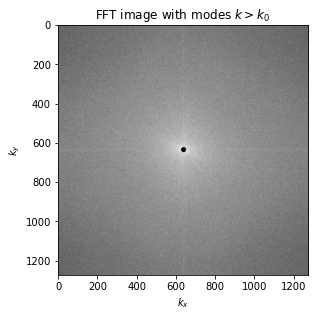

In [16]:
plt.title(r'FFT image with modes $k > k_0$ ')
plt.rcParams["figure.figsize"] = (6,4.6)
plt.xlabel(r'$k_x$')
plt.ylabel(r'$k_y$')
plt.imshow(np.log(np.abs(np.fft.fftshift(fftrhino_small).real) + 0.01), cmap='gray')

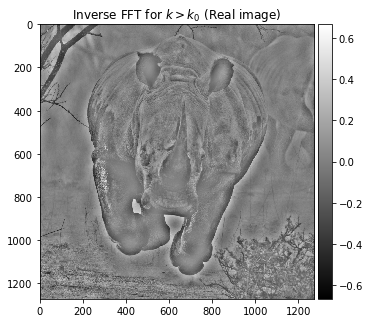

In [17]:
inverse_rhino_small = np.fft.ifftn(fftrhino_small)

plt.title(r'Inverse FFT for $k>k_0$ (Real image)')
plt.rcParams["figure.figsize"] = (8,6)
imshow(inverse_rhino_small.real, cmap='gray')

## 3 Power Spectrum

We are going now to practice 2P-statistics in Fourier Space. We will follow the procedure listed in the slides:

    • Distributing particles onto the regular grid
    • Fourier transformation
    • Estimating power spectrum
    • Deconvolving window function*
    • Subtracting shot noise
    
1. We will use the file ‘HalolistNOFOFR1000.txt’ the format is x,y,z,mass. We will use a gridsize = 10. for estimating the density using the NGP particle distribution scheme. Determine the min and max of the coordinates to determine the size of the box, you will need those quantities for the density estimation.


2. Plot a slide of the density, you can use imshow() or meshgrid(), take a look to the doc.


3. Use the FFT in n dimensions for performing the Fourier Transform. Plot the real and imaginary part of the density in FS.


4. Determine kmin and max, you will required later on...


5. Estimate the power spectrum,(Hint:remember the definition in terms of the variance).


6. When computing the average per |k|,the tricky step is to think the k range.


7. Take care of the normalization factors that depends on the FFTW convention, check the doc of the numpy functions used.


8. Compute the window function associated with the density assignment used, (and dimensions).


9. Plot the window function.


10. Subtracting the shot noise, for this you need to compute the number density per Mpc$^3$.

In [18]:
# 1. We start by importing the txt file HalolistNOFOFR1000.txt

filename = 'Halo_list_NO_FOFR_1000.txt'
data = np.loadtxt(filename, skiprows=0, dtype=float)
print(data)

[[7.61204900e+00 2.98679100e+01 7.67292000e+00 3.70500000e+11]
 [8.62143700e+00 2.98962250e+01 7.42366100e+00 5.18700000e+11]
 [1.22679900e+01 3.04223900e+01 1.17202280e+01 5.18700000e+11]
 ...
 [9.69263672e+02 9.82530762e+02 9.75283508e+02 2.22300000e+11]
 [9.81376160e+02 9.82569153e+02 9.84809387e+02 5.92800000e+11]
 [9.67553345e+02 9.99364685e+02 9.71712830e+02 5.18700000e+11]]


In [19]:
data.shape # corroborating shape of array

(616457, 4)

### Next we will estimate the density using the **NGP** particle distribution scheme.

Remember $ \rho = m/V = \frac{m}{\Delta x \Delta y \Delta z}$. Although, notice that here we need the **number density** ($n= 1/V$, particle counting) even when we have a mass, not the density itself. 

In the data file, there's a *mass point* for every position (x,y,z), so one can define a volumen from a grid and add up all the *points* inside that box.

In [20]:
# format: x,y,z,mass

x = data[:,[0]]
y = data[:,[1]]
z = data[:,[2]]
m = data[:,[3]]

num_points = data.shape[0]

In [21]:
# Determining the min and max of the coordinates to set the size of the box,
x_min = min(x)
x_max = max(x)
y_min = min(y)
y_max = max(y)
z_min = min(z)
z_max = max(z)

print('The min. and max.values of x,y,z,m are, respectivelly, ', x_min,', ',x_max,', ', y_min,', ',y_max,', ', z_min,', ',z_max)

The min. and max.values of x,y,z,m are, respectivelly,  [0.033786] ,  [999.966125] ,  [0.040336] ,  [999.954712] ,  [0.054647] ,  [999.976807]


In [22]:
# these quantities are used for the density estimation as follows

# Defining arrays for the grid with gridsize = 10 

gridsize = 10

grid_x = np.arange(x_min,x_max,gridsize)
grid_y = np.arange(y_min,y_max,gridsize)
grid_z = np.arange(z_min,z_max,gridsize)

grid_x = np.append(grid_x, x_max)
grid_y = np.append(grid_y, y_max)
grid_z = np.append(grid_z, z_max)

print(grid_x)
print(grid_y)
print(grid_z)

[3.37860000e-02 1.00337860e+01 2.00337860e+01 3.00337860e+01
 4.00337860e+01 5.00337860e+01 6.00337860e+01 7.00337860e+01
 8.00337860e+01 9.00337860e+01 1.00033786e+02 1.10033786e+02
 1.20033786e+02 1.30033786e+02 1.40033786e+02 1.50033786e+02
 1.60033786e+02 1.70033786e+02 1.80033786e+02 1.90033786e+02
 2.00033786e+02 2.10033786e+02 2.20033786e+02 2.30033786e+02
 2.40033786e+02 2.50033786e+02 2.60033786e+02 2.70033786e+02
 2.80033786e+02 2.90033786e+02 3.00033786e+02 3.10033786e+02
 3.20033786e+02 3.30033786e+02 3.40033786e+02 3.50033786e+02
 3.60033786e+02 3.70033786e+02 3.80033786e+02 3.90033786e+02
 4.00033786e+02 4.10033786e+02 4.20033786e+02 4.30033786e+02
 4.40033786e+02 4.50033786e+02 4.60033786e+02 4.70033786e+02
 4.80033786e+02 4.90033786e+02 5.00033786e+02 5.10033786e+02
 5.20033786e+02 5.30033786e+02 5.40033786e+02 5.50033786e+02
 5.60033786e+02 5.70033786e+02 5.80033786e+02 5.90033786e+02
 6.00033786e+02 6.10033786e+02 6.20033786e+02 6.30033786e+02
 6.40033786e+02 6.500337

In [23]:
grid_x.shape # this is also the shape of grid_y and z

(101,)

In [24]:
density_arr = np.zeros((grid_x.shape[0]-1,grid_y.shape[0]-1,grid_z.shape[0]-1)) # even when we know it's a cube of 100 pts each side

for i in range(num_points):
# x    
    x_dist = abs(grid_x - x[i])
    x_min = min(x_dist)
    
    x_ind = np.where(x_dist == x_min)
    if grid_x[x_ind[0][0]] < x[i]:
        x_dens_ind = x_ind[0][0]
    else:
        x_dens_ind = x_ind[0][0] -1
# y        
    y_dist = abs(grid_y - y[i])
    y_min = min(y_dist)
    
    y_ind = np.where(y_dist == y_min)
    if grid_y[y_ind[0][0]] < y[i]:
        y_dens_ind = y_ind[0][0]
    else:
        y_dens_ind = y_ind[0][0] -1
#  z    
    z_dist = abs(grid_z - z[i])
    z_min = min(z_dist)
    
    z_ind = np.where(z_dist == z_min)
    if grid_z[z_ind[0][0]] < z[i]:
        z_dens_ind = z_ind[0][0]
    else:
        z_dens_ind = z_ind[0][0] -1

    density_arr[x_dens_ind,y_dens_ind, z_dens_ind] += 1

In [25]:
print(density_arr.shape)
density_arr

(100, 100, 100)


array([[[ 0.,  0.,  0., ...,  1.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 2.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0., 16.,  0., ...,  0.,  0.,  0.],
        [ 0.,  4.,  8., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 2.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 2.,  0.,  3., ...,  0.,  0.,  1.],
        [ 2.,  1.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  1., ...,  0.,  0.,  0.],
        [ 5.,  0.,  4., ...,  0.,  1.,  0.],
        [ 5.,  1.,  2., ...,  0.,  0.,  1.],
        ...,
        [ 1.,  0.,  4., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  3.,  0., ...,  0.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  4.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.

In [26]:
# axis=0 sum over 'depth' (z_dens), axis = 1 -> sum over column (y_dens), axis = 2 -> sum over row (x_dens)

density_xy = np.sum(density_arr,axis=0) # this means we are taking the sum over z axis (of all the elements x & y in one slide)

density_xz = np.sum(density_arr,axis=1) # this means we are taking the sum over y axis (of all the elements x & z in one slide)

density_yz = np.sum(density_arr,axis=2)

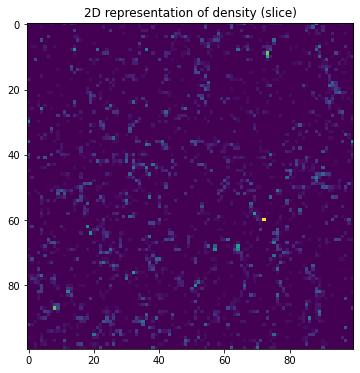

In [27]:
plt.title(r'2D representation of density (slice)')
plt.rcParams["figure.figsize"] = (6,6)
plt.imshow(density_arr[:,50,:])

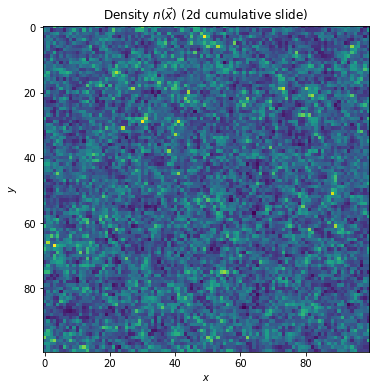

In [28]:
# 2. Plotiting a slide of the density (i.e., a picture with, e.g., z fixed) with imshow()

plt.title(r'Density $n(\vec{x})$ (2d cumulative slide)')
plt.rcParams["figure.figsize"] = (5,5)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.imshow(density_xy)

In [29]:
# 3. Using n-dim FFT.

density_fft = np.fft.fftn(density_arr)
density_fft

array([[[ 6.16457000e+05+0.00000000e+00j,
         -2.14646226e+03-7.79786822e+03j,
          5.72189368e+03+3.45571073e+03j, ...,
         -5.03462165e+03+2.28859234e+03j,
          5.72189368e+03-3.45571073e+03j,
         -2.14646226e+03+7.79786822e+03j],
        [ 4.97612643e+03-1.24748795e+03j,
         -7.55800082e+03-2.44574516e+03j,
          5.81554410e+03+3.38071692e+03j, ...,
          8.46657658e+02-3.58369728e+03j,
         -1.72220313e+03-2.45051269e+02j,
         -4.93333763e+03+3.18303236e+03j],
        [ 1.31917893e+03-6.58412858e+03j,
         -1.56697069e+03-4.46211766e+03j,
          1.45867925e+03-3.02938528e+03j, ...,
         -2.57057342e+03+2.02883735e+03j,
          7.24264394e+03-2.59402095e+03j,
          1.87219275e+03-1.53457560e+03j],
        ...,
        [-1.72836680e+03+2.12723437e+02j,
          7.25464961e+03-7.52215612e+02j,
          8.05063709e+03-4.29063060e+03j, ...,
          1.87359128e+02+1.95086990e+03j,
          3.32940752e+03+7.61922336e+03j

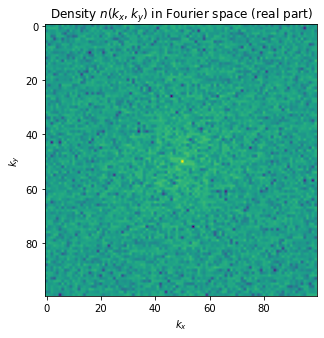

In [30]:
# In order to plot this as a slide we make the following

density_xy_fft = np.fft.fftshift(np.fft.fft2(density_xy))

# Plotting real part of density in FS
plt.title(r'Density $n(k_x,k_y)$ in Fourier space (real part)')
plt.xlabel(r'$k_x$')
plt.ylabel(r'$k_y$')
plt.imshow(np.log(np.abs(density_xy_fft.real) + 0.01)) # note that this is just the real part

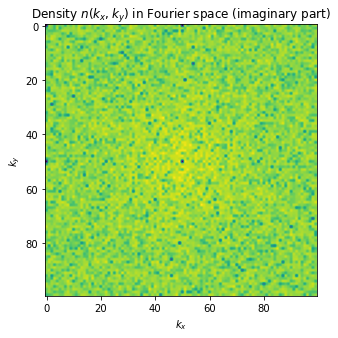

In [31]:
density_xy_fft = np.fft.fftshift(np.fft.fft2(density_xy))

# Plotting imag. part of density in FS
plt.title(r'Density $n(k_x,k_y)$ in Fourier space (imaginary part)')
plt.xlabel(r'$k_x$')
plt.ylabel(r'$k_y$')
plt.imshow(np.log(np.abs(density_xy_fft.imag) + 0.01)) # this is just the imaginary part

In [32]:
# 4. Determining the min and max values of k

k_dens_x = np.fft.fftfreq(density_arr.shape[0])
k_dens_y = np.fft.fftfreq(density_arr.shape[1])
k_dens_z = np.fft.fftfreq(density_arr.shape[2])

kmin_x = min(k_dens_x)
kmax_x = max(k_dens_x)

kmin_y = min(k_dens_y)
kmax_y = max(k_dens_y)

kmin_z = min(k_dens_z)
kmax_z = max(k_dens_z)

print('The min. & max. values of k in each dimension are, respectively: \n', 'kmin_x=', kmin_x, 'kmax_x=', kmax_x,'kmin_y=', kmin_y,'kmax_y=', kmax_y,'kmin_z=', kmin_z, 'kmax_z=', kmax_z,)
# note that logically they're the same in x,y,z

The min. & max. values of k in each dimension are, respectively: 
 kmin_x= -0.5 kmax_x= 0.49 kmin_y= -0.5 kmax_y= 0.49 kmin_z= -0.5 kmax_z= 0.49


Also, even when the actual min. and max. values of k arrays are the previous ones, given the concept of the *Nyquist frequency* (maximal k) as

$$
    k_{\mbox{Nyq}} = \frac{2\pi N}{2 L}
$$

and the minimum k (largest possible scale)

$$
    k_{min} = \frac{2\pi}{L}
$$

one can get the real extremal values.

In [33]:
N = grid_x.shape[0] -1
L = gridsize*N
print('N=',N,'; L=',L)

k_nyq = (2* math.pi*N)/(2*L)

k_min = (2*math.pi)/L

print('The maximal (Nyquist) and minimum values of k are \n k_Nyq=', k_nyq, '  &   k_min=',k_min)

N= 100 ; L= 1000
The maximal (Nyquist) and minimum values of k are 
 k_Nyq= 0.3141592653589793   &   k_min= 0.006283185307179587


#### 5. PS defined in terms of the variance.

In a box with cell of total side (not gridsie) L=1000, we will have k-modes sampled as

$$\Delta_k = \frac{2\pi}{L},$$

such that the DFT is performed by means of $\delta (\vec{x})$ (placed on a lattice of N³ grid pts, with spacing _gridsize_=L/N = 1000/100 = 10) as 

$$
    \delta_k^{DFT} = \frac{1}{N^3} \sum_r \exp{[-i\vec{k}\cdot \vec{r}]} \delta(\vec{r})
$$

$$
    \delta^{DFT}(\vec{r}) = \sum_r \exp{[i\vec{k}\cdot \vec{r}]} \delta_k^{DFT}
$$

Remeber that we can express the (unnormalized) power spectrum in terms of the variance through

$$
    P(k) = \frac{1}{(2\pi)^3} Var\left( \delta(\vec{k}) \right).
$$

In [34]:
print(k_dens_x)
print(k_dens_y)
print(k_dens_z) # They all have the same values in the same order.

[ 0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11
  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21  0.22  0.23
  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31  0.32  0.33  0.34  0.35
  0.36  0.37  0.38  0.39  0.4   0.41  0.42  0.43  0.44  0.45  0.46  0.47
  0.48  0.49 -0.5  -0.49 -0.48 -0.47 -0.46 -0.45 -0.44 -0.43 -0.42 -0.41
 -0.4  -0.39 -0.38 -0.37 -0.36 -0.35 -0.34 -0.33 -0.32 -0.31 -0.3  -0.29
 -0.28 -0.27 -0.26 -0.25 -0.24 -0.23 -0.22 -0.21 -0.2  -0.19 -0.18 -0.17
 -0.16 -0.15 -0.14 -0.13 -0.12 -0.11 -0.1  -0.09 -0.08 -0.07 -0.06 -0.05
 -0.04 -0.03 -0.02 -0.01]
[ 0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11
  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21  0.22  0.23
  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31  0.32  0.33  0.34  0.35
  0.36  0.37  0.38  0.39  0.4   0.41  0.42  0.43  0.44  0.45  0.46  0.47
  0.48  0.49 -0.5  -0.49 -0.48 -0.47 -0.46 -0.45 -0.44 -0.43 -0.42 -0.41
 -0.4  -0.39 -0.38 -0.37 

In [251]:
# dk = (kmax_x - kmin_x)/((len(k_dens_x)-1)) # dk = 0.01
# dk = 0.02
k_pk_arr = np.linspace(0, 0.86, 50)
dk = 0.86/49 # dk = 0.01755102
print(k_pk_arr, dk)

[0.         0.01755102 0.03510204 0.05265306 0.07020408 0.0877551
 0.10530612 0.12285714 0.14040816 0.15795918 0.1755102  0.19306122
 0.21061224 0.22816327 0.24571429 0.26326531 0.28081633 0.29836735
 0.31591837 0.33346939 0.35102041 0.36857143 0.38612245 0.40367347
 0.42122449 0.43877551 0.45632653 0.47387755 0.49142857 0.50897959
 0.52653061 0.54408163 0.56163265 0.57918367 0.59673469 0.61428571
 0.63183673 0.64938776 0.66693878 0.6844898  0.70204082 0.71959184
 0.73714286 0.75469388 0.7722449  0.78979592 0.80734694 0.82489796
 0.84244898 0.86      ] 0.017551020408163264


In [252]:
pre_var = np.zeros(len(k_pk_arr))
n_count = np.zeros(len(k_pk_arr))
# np.argmin(np.abs(k_pk_arr))

# for every value in k, we're gonna take the variance of delta(k)

for i in range(len(k_dens_x)):         # running for every x value in k  
    for j in range(len(k_dens_y)):     # " in y
        for m in range(len(k_dens_z)):   # even when we know kx = ky = kz
            k = ((k_dens_x[i])**2 + (k_dens_y[j])**2 + (k_dens_z[m])**2)**0.5
            index = np.where( (k_pk_arr +dk/2 > k) & (k_pk_arr-dk/2 < k) )   # it tells us which index satisty the prev. condition
            pre_var[index[0]] += np.abs(density_fft[i][j][m])**2  # associates the density value of certain x,y,z point
            n_count[index[0]] += 1                     # and every time it does it, count one

In [253]:
### so, finally the variance is computed just as the sum of pre_var over the numb. of elements it took

variance_arr = np.zeros(len(pre_var))

for nn in range(len(pre_var)):
    variance_arr[nn] = pre_var[nn]/n_count[nn]
variance_arr

array([3.80019233e+11, 3.85363396e+07, 2.92857750e+07, 2.38973505e+07,
       2.03985748e+07, 1.73782832e+07, 1.54548048e+07, 1.38718812e+07,
       1.16025567e+07, 9.51701936e+06, 8.79239631e+06, 8.10283428e+06,
       7.34142695e+06, 6.83942100e+06, 6.09131478e+06, 5.58272948e+06,
       5.20460033e+06, 5.04871897e+06, 4.67239968e+06, 4.45957620e+06,
       4.21021075e+06, 3.96857644e+06, 3.77684981e+06, 3.66350433e+06,
       3.50012244e+06, 3.38159012e+06, 3.28602005e+06, 3.18619162e+06,
       3.11188262e+06, 3.03715372e+06, 2.89945574e+06, 2.81238580e+06,
       2.72606668e+06, 2.63843695e+06, 2.56663054e+06, 2.51907134e+06,
       2.45626064e+06, 2.40968101e+06, 2.35861192e+06, 2.32580902e+06,
       2.24255976e+06, 2.22973831e+06, 2.17896755e+06, 2.11767408e+06,
       2.13096092e+06, 2.02561876e+06, 1.99934170e+06, 2.13122592e+06,
       2.10963030e+06, 1.77344180e+06])

### FFTW (unnormalized)
Normalization factors (depending on the FFTW convention) are important too.

$$
    P = \frac{V}{N^6} \langle |\delta^{FFTW}|^2 \rangle,
$$

where $V=L^3$.

In [254]:
Pk_arr = (1/(2*np.pi)**(3))*variance_arr

norm_factor = (L**3)/N**6

### so, plotting the normalized PS we get
Pk_normalized = norm_factor*Pk_arr

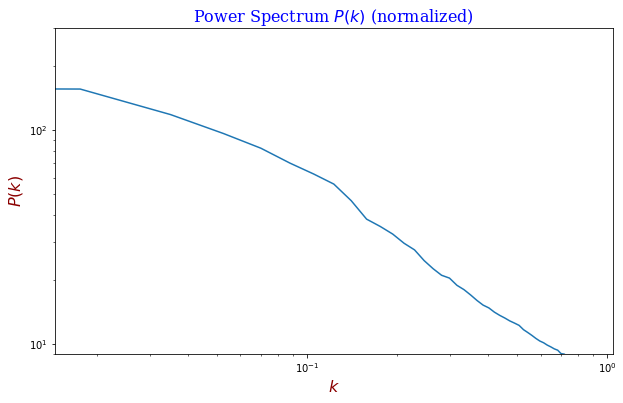

In [409]:
plt.loglog(k_pk_arr,Pk_normalized)
font1 = {'family':'serif','color':'blue','size':16}
font2 = {'family':'serif','color':'darkred','size':16}
plt.title(r'Power Spectrum $P(k)$ (normalized)',fontdict = font1)
plt.xlabel(r"$k$", fontdict = font2)
plt.ylabel(r"$P(k)$", fontdict = font2)
plt.rcParams["figure.figsize"] = (10,6)
plt.ylim(9, 3e2)
plt.show()

#### 8. Window function:

The one dimensional window function for NGP is proportional to the top-hat function

$$
     W_{NGP}(x) =  \frac{1}{H} \mathcal{T} \left( x/H \right) = \left\{
    \begin{array}\\
        1/H & \mbox{if} |x| < H/2 \\
        1/(2H) & \mbox{if} |x| = H/2\\
        0 & \mbox{if otherwise} 
    \end{array}
\right. ,
$$

where $H$ is just a *Hat* factor (scalar) given by $H = \pi/k_N$ ($\mathcal{T}$ stands for **Top-hat**).

We know that this function in fourier space is just the cardinal sine $sinc(\theta)$

$$
    W_{NGP}(k) = \mathcal{FT[T]}(Hk) = \boxed{sinc \left( \frac{H k}{2} \right) = sinc \left( \frac{\pi k}{2 k_N} \right)}.
$$

Also, $W(\vec{x}) = W_1(x_1)W_2(x_2)W_3(x_3)$, then

$$
W(\vec{k}) = sinc \left( \frac{\pi k_1}{2k_N} \right) sinc\left( \frac{\pi k_2}{2k_N}\right) sinc \left( \frac{\pi k_3}{2k_N} \right),
$$
i.e., 
$$
\Rightarrow W(\vec{k}) = sinc \left( \frac{H k_1}{2} \right) sinc\left( \frac{H k_2}{2}\right) sinc \left( \frac{H k_3}{2} \right).
$$

In [204]:
H = math.pi/k_nyq

Window = np.zeros(((len(k_dens_x))//2,(len(k_dens_y))//2,(len(k_dens_z))//2))

for i in range((len(k_dens_x))//2):
    for j in range((len(k_dens_y))//2):
        for m in range((len(k_dens_z))//2):
            Window[i,j,m] = np.sinc(H*k_dens_x[i]/2)*np.sinc(H*k_dens_y[j]/2)*np.sinc(H*k_dens_z[m]/2)

In [205]:
Window.shape

(50, 50, 50)

So, now we have to **deconvolve** the estimated PS in order to have the 'real' density contrast (until now we just have the power of density contrast convolved with the window function due to the distribution scheme).

In order to doing so,

$$
    \delta (\vec{k}) = \frac{\delta^m (\vec{k})}{W(\vec{k})}, \ \ k < k_N,
$$

i.e.,

$$
    P(\vec{k}) = \left|\frac{\delta^m (\vec{k})}{W(\vec{k})}\right|^2 = P^m(k_1,k_2,k_3) \left[sinc \left( \frac{\pi k_1}{2k_N} \right) sinc\left( \frac{\pi k_2}{2k_N}\right) sinc \left( \frac{\pi k_3}{2k_N} \right) \right]^{-2}.
$$

In [289]:
### Getting the PS in 3D as a function of vec{k}, i.e., kx,ky,kz

Pk_3d_overWindow = np.zeros(((len(k_dens_x))//2,(len(k_dens_y))//2,(len(k_dens_z))//2))

for i in range((len(k_dens_x))//2):
    for j in range((len(k_dens_y))//2):
        for m in range((len(k_dens_z))//2):
            k =((k_dens_x[i])**2 + (k_dens_y[j])**2 + (k_dens_z[m])**2)**0.5
            index = np.where( (k_pk_arr + dk/2 > k) & (k_pk_arr - dk/2 < k) )
            if index[0].size == 0:
                Pk_3d_overWindow[i,j,m] = Pk_3d_overWindow[i,j,m-1]
            else:
                Pk_3d_overWindow[i,j,m] = Pk_normalized[index[0][0]]/(Window[i,j,m])**2
#             Pk_3d[i,j,m] = Pk_normalized[index[0][0]] #/(Window[i,j,m])**2
Pk_3d_overWindown   # THIS IS ALREADY AFFECTED BY WINDOW FUNCTION (i.e., DECONVOLUTION)

array([[[1.53202542e+06, 1.56641101e+02, 1.60570542e+02, ...,
         8.81872881e+02, 8.07312847e+02, 7.61860859e+02],
        [1.56641101e+02, 1.57935805e+02, 1.61897724e+02, ...,
         8.89161928e+02, 8.13985624e+02, 7.68157956e+02],
        [1.60570542e+02, 1.61897724e+02, 1.26120926e+02, ...,
         9.11467116e+02, 8.34404967e+02, 7.87427683e+02],
        ...,
        [8.81872881e+02, 8.89161928e+02, 9.11467116e+02, ...,
         4.48192194e+04, 4.10298722e+04, 3.90931087e+04],
        [8.07312847e+02, 8.13985624e+02, 8.34404967e+02, ...,
         4.10298722e+04, 3.70385180e+04, 3.57878891e+04],
        [7.61860859e+02, 7.68157956e+02, 7.87427683e+02, ...,
         3.90931087e+04, 3.57878891e+04, 3.45794885e+04]],

       [[1.56641101e+02, 1.57935805e+02, 1.61897724e+02, ...,
         8.89161928e+02, 8.13985624e+02, 7.68157956e+02],
        [1.57935805e+02, 1.59241210e+02, 1.63235877e+02, ...,
         8.96511223e+02, 8.20713555e+02, 7.74507102e+02],
        [1.61897724e+02, 

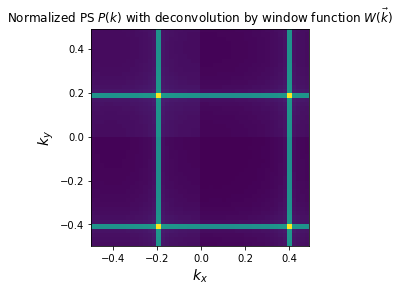

In [379]:
# Convertig Pk_3d into a 2d slide
Pk_xy = Pk_3d_overWindow[:,:,2]

# Now plotting it
plt.imshow(np.log10(np.abs(np.fft.fftshift(Pk_xy).real) + 0.1), extent=(kmin_x,kmax_x,kmin_y,kmax_y))
plt.title(r'Normalized PS $P(k)$ with deconvolution by window function $W(\vec{k})$',fontsize=12)
plt.xlabel(r'$k_x$', fontsize=14)
plt.ylabel(r'$k_y$', fontsize=14)
plt.rcParams["figure.figsize"] = (5,5)
plt.show()

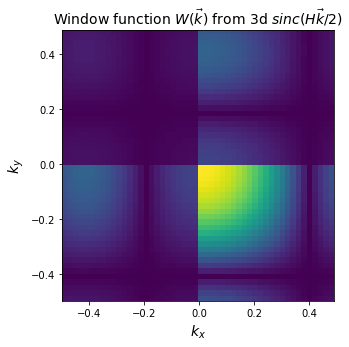

In [402]:
# The latter looks like this bc the window function of course has the following form:

# PLOTTING 3D WINDOW AS A SLIDE

plt.imshow(np.log10(np.abs(np.fft.fftshift(Window[:,:,25]).real)+0.1), extent=(kmin_x,kmax_x,kmin_y,kmax_y))
plt.title(r'Window function $W(\vec{k})$ from 3d $sinc(H\vec{k}/2)$',fontsize=14)
plt.xlabel(r'$k_x$', fontsize=14)
plt.ylabel(r'$k_y$', fontsize=14)
plt.rcParams["figure.figsize"] = (5,5)
plt.show()

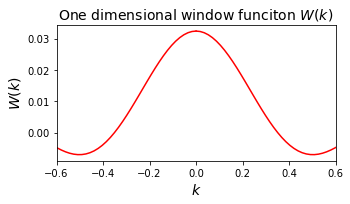

In [404]:
# PLOTTING WINDOW FUNCTION AS A 1D CURVE

# First giving a single dimensional value from 'Window' to every point in window_1d
Window_1d = np.zeros(50) # i.e., (len(k_dens_x))//2
for w in range(50):
    Window_1d[w] = Window[w,25,25]
    
plt.plot(k_pk_arr, Window_1d, color = 'red')
plt.plot(-k_pk_arr, Window_1d, color = 'red')
plt.title('One dimensional window funciton $W(k)$',fontsize = 14)
plt.xlabel('$k$', fontsize = 14)
plt.ylabel('$W(k)$', fontsize = 14)
plt.rcParams["figure.figsize"] = (5,2.5)
plt.xlim(-0.6,0.6)
plt.show()

### 10. Shot noise substraction
Due to the discreteness of data, a superposition of our fields with some noise contribution will be presented.
In order to subtracte this *shot noise*, we compute the number density per Mpc$^3$ (which gives us the amplitude of this effect) as follows:

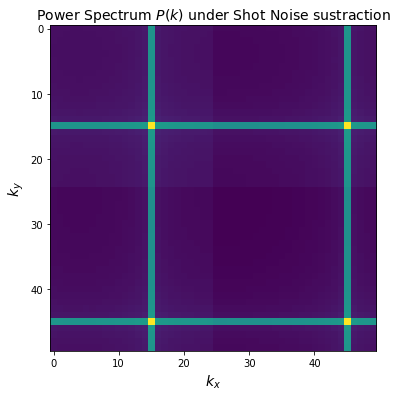

In [414]:
# The galaxy number density per Mpc^3 is
dens_per_Mpc3 = data.shape[0]/(len(k_dens_x)//2*len(k_dens_y)//2*len(k_dens_z)//2)
# i.e., the total number of 'points' in the data file 'Halo' over the length of x, y, z (vol.)

for i in range((len(k_dens_x))//2):
    for j in range((len(k_dens_y))//2):
        for m in range((len(k_dens_z))//2):
            Pk_3d_overWindow[i,j,m] = Pk_3d_overWindow[i,j,m] - 1/dens_per_Mpc3

### Finally, plotting the resulting PS without Shot Noise
plt.imshow(np.log10(np.abs(np.fft.fftshift(Pk_3d_overWindow[:,:,25]).real) + 0.1))
plt.title(r'Power Spectrum $P(k)$ under Shot Noise sustraction',fontsize=14)
plt.xlabel(r'$k_x$', fontsize=14)
plt.ylabel(r'$k_y$', fontsize=14)
plt.rcParams["figure.figsize"] = (5,5)
plt.show()

# 4 Computing Correlation Function Estimator in a simple case 2D.

1. Download the files Data1.txt and Data2.txt to compute the correlation function using Davis-Peebles and Landy-Szalay estimators in a range of 200 using 1 as bin size. (Hint: Follow the naive approach of nested loops). You have to generate the random with same number of points than the data by yourself using numpy.random.rand function. The data are in 2 dimensions and have values between 0 and 100 for both.


2. What can you conclude about Data1.txt and Data2.txt?


3. Estimate the time required to run this dumb code. Could you scale the time and give an idea of how much time it would require to compute the correlation function of a survey like DESI with 18 millions objects and a random sample of 10 times bigger than the catalog.

In [292]:
# 1. We start by importing the txt files Data_1.txt and Data_2.txt

Data_1_filename = 'Data_1.txt'
Data_2_filename = 'Data_2.txt'

data_1 = np.loadtxt(Data_1_filename, skiprows=0, dtype=float)
data_2 = np.loadtxt(Data_2_filename, skiprows=0, dtype=float)

print(data_1, '\n \n \n', data_2)
print(' ', data_1.shape,'\n', data_2.shape)       # Data files with 2 rows and 1000 columns

[[25.83697573 15.54384537 66.64687368 ... 47.17516641 29.16816987
  78.38381417]
 [ 1.17259427 10.90502139 99.17032425 ... 14.2208583  81.18652945
  52.26646937]] 
 
 
 [[35.33398102 30.02945405 61.17184577 ... 47.19004416 29.19387406
  78.38381417]
 [24.8563612  29.42236301 73.44352433 ... 14.27131668 81.17142517
  52.26646937]]
  (2, 1000) 
 (2, 1000)


In [293]:
max_data1 = np.max(data_1)
min_data1 = np.min(data_1)

max_data2 = np.max(data_2)
min_data2 = np.min(data_2)

# coroboring the data values runs ~from 0 to 100
print('max1=', max_data1, '\n min1=', min_data1,  '\n max2=', max_data2, '\n min2=',  min_data2)

max1= 99.98762200174627 
 min1= 0.07553589300699493 
 max2= 99.66645111210072 
 min2= 2.6995803435866907


In [314]:
# Storing the X,Y coordinates as each individual row from data_1 & 2.
x1 = data_1[0,:]
y1 = data_1[1,:]

x2 = data_2[0,:]
y2 = data_2[1,:]

### 4.1. "Davis-Peebles" and "Landay-Szalay" Estimators

Using this two type of estimators for the correlation $\xi(\vec{r})$ with **range=200** and **binsize = 1**, which are described as

$$
    \hat{\xi}_{DP}(r) = \frac{DD}{RD} - 1,
$$

$$
    \hat{\xi}_{LS}(r) = \frac{DD - 2RD + RR}{RR},
$$

respectively, we make the following:

In [360]:
### Generating the random set

R = 100*np.random.rand(2,1000) # rescaling to 0 - 100 (in order to make it coincide w/ data)

# Analogously, we get X,Y coordinates for the random array

Rx = R[0,:]
Ry = R[1,:]

In [415]:
# runtime count ("parallel" table)
import time
start = time.time()

DD1 = np.zeros(200)
DD2 = np.zeros(200)
DR1 = np.zeros(200)
DR2 = np.zeros(200)
RR = np.zeros(200)

# NESTED LOOPS for calculate distance between points    # *** por qué rango de 200? no sería del shape de la data?

for i in range(data_1.shape[1]): # i.e., 1000 (number of x's, same for y)
    for j in range(data_1.shape[1]): # i.e., 1000
        if i!=j:
            dist_1 = ((x1[i] - x1[j])**2 + (y1[i] - y1[j])**2)**0.5
            dist_2 = ((x2[i] - x2[j])**2 + (y2[i] - y2[j])**2)**0.5  # we do the same for data_2 taking advantage of the same loops
            dist_r = ((Rx[i] - Rx[j])**2 + (Ry[i] - Ry[j])**2)**0.5
            dist_rd1 = ((Rx[i] - x1[j])**2 + (Ry[i] - y1[j])**2)**0.5 # now for the Data-Random case
            dist_rd2 = ((Rx[i] - x2[j])**2 + (Ry[i] - y2[j])**2)**0.5
            
            for k in range(200):  # as it's said in the instruction
                if ((dist_1 > k - 0.5) and (dist_1 < k + 0.5)):
                    DD1[k] += 1
                
                if ((dist_2 > k - 0.5) and (dist_2 < k + 0.5)):
                    DD2[k] += 1
                
                if ((dist_r > k - 0.5) and (dist_r < k + 0.5)):
                    RR[k] += 1
                
                if ((dist_rd1 > k - 0.5) and (dist_rd1 < k + 0.5)):
                    DR1[k] += 1
                
                if ((dist_rd2 > k - 0.5) and (dist_rd2 < k + 0.5)):
                    DR2[k] += 1

end = time.time()
print("The time used to execute this (in seconds) was:", end - start)


The time used to execute this (in seconds) was: 158.70066165924072


<ipython-input-367-cc6b90d852ab>:3: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(radio, (DD1/RR - 1), label=r'Data 1')
<ipython-input-367-cc6b90d852ab>:4: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(radio, (DD2/RR - 1), label=r'Data 2')


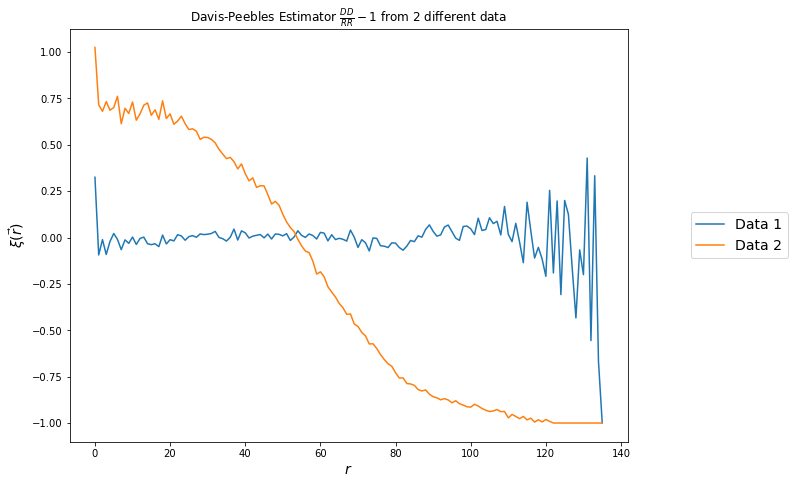

In [367]:
### PLOTTING

radio = np.arange(0,200)
radio

plt.plot(radio, (DD1/RR - 1), label=r'Data 1')
plt.plot(radio, (DD2/RR - 1), label=r'Data 2')
plt.legend(loc='right',bbox_to_anchor=(1.3, 0.5), fontsize = 14)
plt.ylabel(r"$\xi(\vec{r})$", fontsize = 14)
plt.xlabel(r"$r$", fontsize = 14)

plt.title(r'Davis-Peebles Estimator $\frac{DD}{RR}-1$ from 2 different data')
plt.rcParams["figure.figsize"] = (10,7.6)
plt.show()

<ipython-input-366-315f26bc5819>:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(radio, ((DD1 - 2*DR1 + RR)/RR), label=r'Data 1')
<ipython-input-366-315f26bc5819>:3: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(radio, ((DD1 - 2*DR1 + RR)/RR), label=r'Data 1')
<ipython-input-366-315f26bc5819>:4: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(radio, ((DD2 - 2*DR2 + RR)/RR), label=r'Data 2')


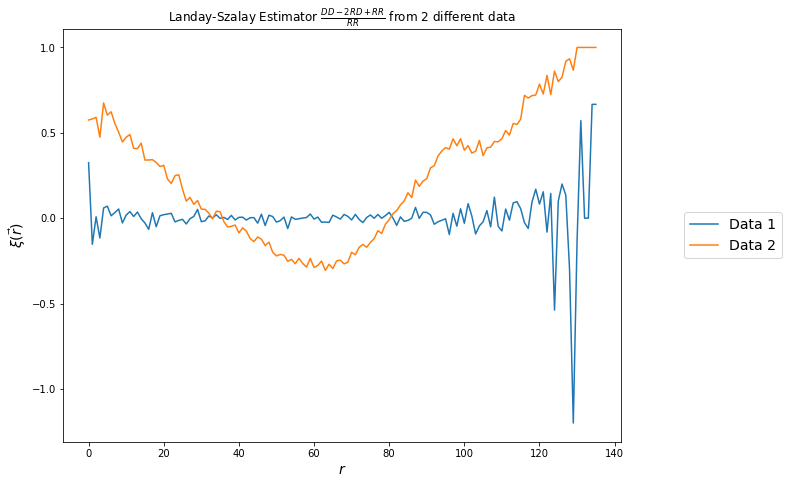

In [366]:
### PLOTTING

plt.plot(radio, ((DD1 - 2*DR1 + RR)/RR), label=r'Data 1')
plt.plot(radio, ((DD2 - 2*DR2 + RR)/RR), label=r'Data 2')
plt.legend(loc='right',bbox_to_anchor=(1.3, 0.5), fontsize = 14)
plt.ylabel(r"$\xi(\vec{r})$", fontsize = 14)
plt.xlabel(r"$r$", fontsize = 14)
plt.title(r'Landay-Szalay Estimator $\frac{DD - 2RD + RR}{RR}$ from 2 different data')
plt.rcParams["figure.figsize"] = (10,7.6)
plt.show()

### 2. Answer:
The main difference to note is that the data from file 1 show a smaller oscilation, so, they present an almost plane correlation, for both DP and LS estimators.

### 3. Answer:
The time it would take to get the CF of a survey like DESI with 18 millions objects and a random sample of 10 times bigger than the catalog could be dummly computed as

$$
    1.8 \times 10^7 \times 10\times this\_time \simeq 2.8566 \times 10^{10}\ s \sim 900 \ yr.
$$